## *MoMA Metadata Visualizations*

In [1]:
from urllib.request import urlopen
import csv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import os
os.chdir('/sharedfolder/')

In [3]:
## Downloading Museum of Modern Art metadata CSV

!wget -N https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv

--2018-04-19 14:46:14--  https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55439945 (53M) [text/plain]
Saving to: ‘Artworks.csv’

Artworks.csv        100%[===================>]  52.87M  1.27MB/s    in 37s     

2018-04-19 14:46:52 (1.45 MB/s) - ‘Artworks.csv’ saved [55439945/55439945]



In [4]:
## Loading CSV as list of lists

metadata_table = []

with open('Artworks.csv') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        metadata_table.append(row)

metadata_table[:3] # Viewing first 3 rows in table

[['\ufeffTitle',
  'Artist',
  'ConstituentID',
  'ArtistBio',
  'Nationality',
  'BeginDate',
  'EndDate',
  'Gender',
  'Date',
  'Medium',
  'Dimensions',
  'CreditLine',
  'AccessionNumber',
  'Classification',
  'Department',
  'DateAcquired',
  'Cataloged',
  'ObjectID',
  'URL',
  'ThumbnailURL',
  'Circumference (cm)',
  'Depth (cm)',
  'Diameter (cm)',
  'Height (cm)',
  'Length (cm)',
  'Weight (kg)',
  'Width (cm)',
  'Seat Height (cm)',
  'Duration (sec.)'],
 ['Ferdinandsbrücke Project, Vienna, Austria, Elevation, preliminary version',
  'Otto Wagner',
  '6210',
  '(Austrian, 1841–1918)',
  '(Austrian)',
  '(1841)',
  '(1918)',
  '(Male)',
  '1896',
  'Ink and cut-and-pasted painted pages on paper',
  '19 1/8 x 66 1/2" (48.6 x 168.9 cm)',
  'Fractional and promised gift of Jo Carole and Ronald S. Lauder',
  '885.1996',
  'Architecture',
  'Architecture & Design',
  '1996-04-09',
  'Y',
  '2',
  'http://www.moma.org/collection/works/2',
  'http://www.moma.org/media/W1siZiIsI

In [5]:
## Save first row to 'column_headers' variable,
# then view column headers next to their index values

column_headers = metadata_table[0]

list(enumerate(column_headers))

[(0, '\ufeffTitle'),
 (1, 'Artist'),
 (2, 'ConstituentID'),
 (3, 'ArtistBio'),
 (4, 'Nationality'),
 (5, 'BeginDate'),
 (6, 'EndDate'),
 (7, 'Gender'),
 (8, 'Date'),
 (9, 'Medium'),
 (10, 'Dimensions'),
 (11, 'CreditLine'),
 (12, 'AccessionNumber'),
 (13, 'Classification'),
 (14, 'Department'),
 (15, 'DateAcquired'),
 (16, 'Cataloged'),
 (17, 'ObjectID'),
 (18, 'URL'),
 (19, 'ThumbnailURL'),
 (20, 'Circumference (cm)'),
 (21, 'Depth (cm)'),
 (22, 'Diameter (cm)'),
 (23, 'Height (cm)'),
 (24, 'Length (cm)'),
 (25, 'Weight (kg)'),
 (26, 'Width (cm)'),
 (27, 'Seat Height (cm)'),
 (28, 'Duration (sec.)')]

In [6]:
## Removing column header row (defined in the previous cell) from 'metadata_table'

metadata_table = metadata_table[1:]

In [7]:
## Viewing a random metadata record. Run this cell a few times to get a feel for the schema.

import random

random.choice(metadata_table)

['Kabala',
 'Assane Kouyaté',
 '43643',
 '(Malian, born 1954)',
 '(Malian)',
 '(1954)',
 '(0)',
 '(Male)',
 '2002',
 '35mm film',
 '',
 'Gift of Global Film Initiative',
 '66033',
 'Film',
 'Film',
 '2006-03-31',
 'N',
 '169906',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [8]:
## Viewing a random 'height' value

import random

row = random.choice(metadata_table)
height = row[23]
print(height)

# *Bar Graph: Medium*

In [33]:
## Creating lists of rows that contain the words 'lithograph', 'woodcut', and 'engraving' in the 'Medium' field

lithograph_rows = []
woodcut_rows = []
engraving_rows = []

for row in metadata_table:
    medium = row[9]                     # 'Medium' field located at index 9 in each row            
    if 'lithograph' in medium.lower():
        lithograph_rows.append(row)     
    if 'woodcut' in medium.lower():     # Using .lower() on field to standardize it, and looking for a lowercase substring 
        woodcut_rows.append(row)
    if 'engraving' in medium.lower():
        engraving_rows.append(row)

# Note that these lists of rows overlap slightly. Some items in MoMA's collection may include two or three of the key words.

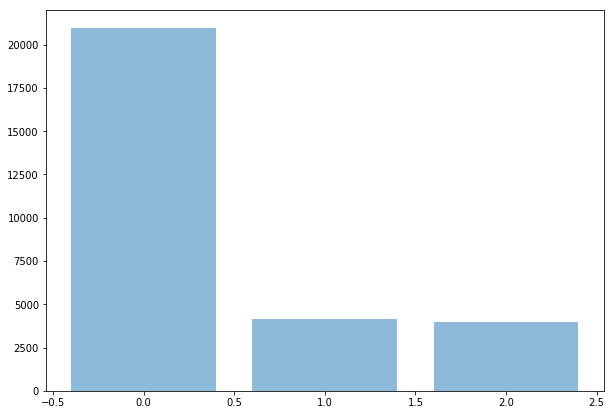

In [34]:
## Plotting a basic bar graph

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))

x_values = [len(lithograph_rows), len(woodcut_rows), len(engraving_rows)]  ## Using the length of each category's 
                                                                           # list of rows to set bar heights in plot
x_pos = range(len(x_values))          # Location of labels along x axis

plt.bar(x_pos, x_values, alpha=0.5)   # Plotting the bar graph

plt.show()

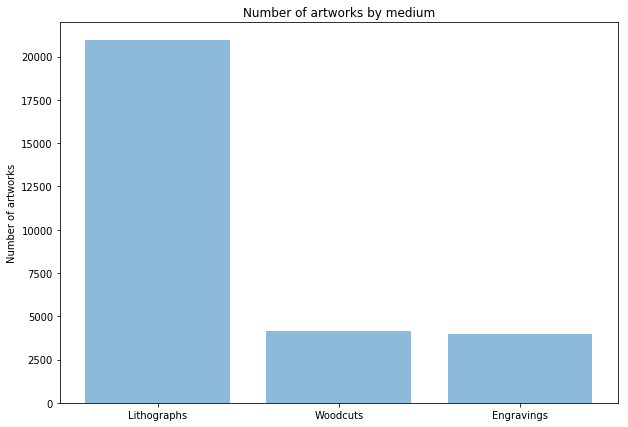

In [35]:
## Plotting bar graph with labels

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))

x_values = [len(lithograph_rows), len(woodcut_rows), len(engraving_rows)]  ## Using the length of each category's 
                                                                           # list of rows for bar heights in plot
x_pos = range(len(x_values))          # Location of labels along x axis

# Setting custom labels, aligned with the position of each bar
x_labels = ['Lithographs', 'Woodcuts', 'Engravings']          # Labels for x axis
plt.xticks(x_pos, x_labels)

plt.bar(x_pos, x_values, alpha=0.5)    # Plotting the bar graph

# Setting title and y axis label
plt.title('Number of artworks by medium')
plt.ylabel('Number of artworks')
 
plt.show()

In [ ]:
# *Bar Graph: Medium*

## Creating lists of rows that contain the words 'lithograph', 'woodcut', and 'engraving' in the 'Medium' field

lithograph_rows = []
woodcut_rows = []
engraving_rows = []

for row in metadata_table:
    medium = row[9]                     # 'Medium' field located at index 9 in each row            
    if 'lithograph' in medium.lower():
        lithograph_rows.append(row)     
    if 'woodcut' in medium.lower():     # Using .lower() on field to standardize it, and looking for a lowercase substring 
        woodcut_rows.append(row)
    if 'engraving' in medium.lower():
        engraving_rows.append(row)

# Note that these lists of rows overlap slightly. Some items in MoMA's collection may include two or three of the key words.

## Plotting a basic bar graph

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))

x_values = [len(lithograph_rows), len(woodcut_rows), len(engraving_rows)]  ## Using the length of each category's 
                                                                           # list of rows to set bar heights in plot
x_pos = range(len(x_values))          # Location of labels along x axis

plt.bar(x_pos, x_values, alpha=0.5)   # Plotting the bar graph

plt.show()

## Plotting bar graph with labels

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))

x_values = [len(lithograph_rows), len(woodcut_rows), len(engraving_rows)]  ## Using the length of each category's 
                                                                           # list of rows for bar heights in plot
x_pos = range(len(x_values))          # Location of labels along x axis

# Setting custom labels, aligned with the position of each bar
x_labels = ['Lithographs', 'Woodcuts', 'Engravings']          # Labels for x axis
plt.xticks(x_pos, x_labels)

plt.bar(x_pos, x_values, alpha=0.5)    # Plotting the bar graph

# Setting title and y axis label
plt.title('Number of artworks by medium')
plt.ylabel('Number of artworks')
 
plt.show()



# *Histograms: Height & Width*

In [9]:
## Creating a list of 'height' values converted to floats, ignoring any missing or faulty values

height_list = []

for row in metadata_table:
    try:
        height = float(row[23])        # Converting height value (at index 23) to float and assigning it to 'height' variable
        height_list.append(height)     # Adding value to 'height_list'
    except:
        pass                           # If we get an error in the 'try' block above, we do nothing and move to the next row.
                                       # This happens when the 'height' field is empty, so it can't be converted to float.

height_list[:10]      # Viewing first 10 height values

[48.6, 40.6401, 34.3, 50.8, 38.4, 35.6, 35.6, 35.6, 35.6, 35.6]

In [10]:
## Creating a list of 'width' values converted to floats, ignoring any missing or faulty values

width_list = []

for row in metadata_table:
    try:
        width = float(row[26])
        width_list.append(width)
    except:
        pass


width_list[:10]

[168.9, 29.8451, 31.8, 50.8, 19.1, 45.7, 45.7, 45.7, 45.7, 45.7]

In [11]:
## Comparing number of records in original metadata with extracted height and width lists

print(len(metadata_table))
print(len(width_list))
print(len(height_list))

# Note that extracted lists are shorter than full metadata table, because we skipped missing values.

133846
114188
115087


In [12]:
## Finding average width (for artworks that include that field)

np.mean(width_list)

38.067509785537425

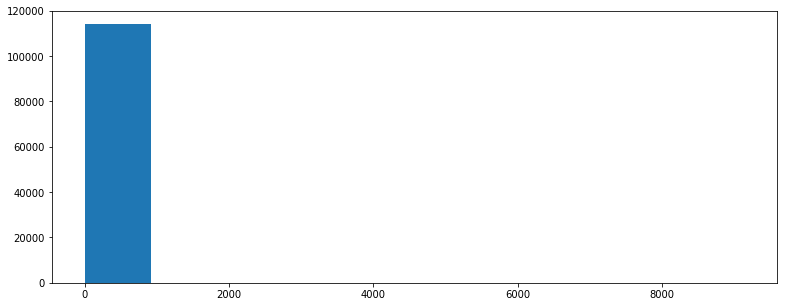

In [13]:
## Creating a basic histogram

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(13,5))
plt.hist(width_list)
plt.show()

# This isn't very useful. Note that the x axis (i.e., width values) extends to 8000 cm, 
# meaning everything else is squeezed into one histogram bar.

In [14]:
## Viewing the biggest width values

sorted(width_list)[::-1][:30]

[9144.0,
 6423.7,
 6400.8,
 5435.6,
 4663.4493,
 4572.0091440183,
 4094.4882,
 2621.3,
 2032.0041,
 1993.9,
 1737.3635,
 1705.6,
 1700.2,
 1645.9232918466,
 1584.9632,
 1531.6231,
 1524.0,
 1524.0,
 1499.2,
 1262.382524765,
 1240.0,
 1226.8224536449,
 1219.2024,
 1218.0,
 1200.0,
 1188.7,
 1127.7623,
 1127.7623,
 1120.1422,
 1102.3]

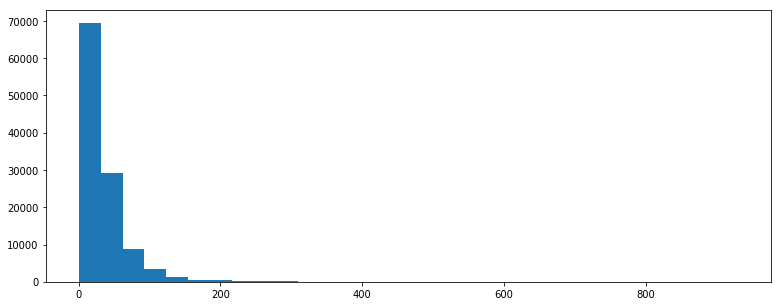

In [15]:
## Let's omit all width values above 1000 cm and break up the plot into 30 bins

plt.figure(figsize=(13,5))

temp_width_list = [item for item in width_list if item<=1000]

plt.hist(temp_width_list, bins=30)

plt.show()

# Getting closer ...

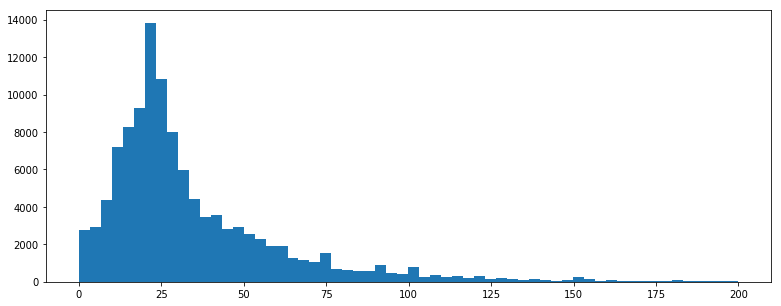

In [16]:
## Omitting values above 200 cm and doubling the number of bins to 60

plt.figure(figsize=(13,5))

temp_width_list = [item for item in width_list if item<200]

plt.hist(temp_width_list, bins=60)

plt.show()

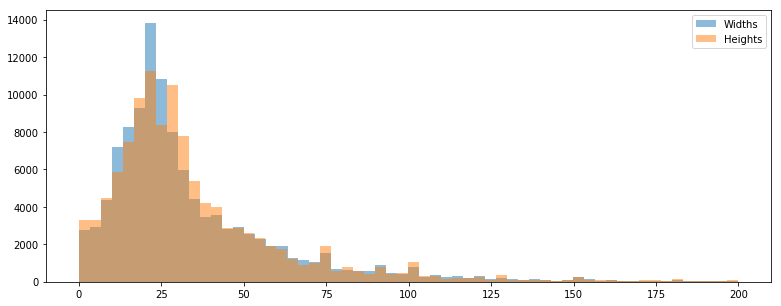

In [17]:
## Plotting two overlaid histograms

plt.figure(figsize=(13,5))

temp_width_list = [item for item in width_list if item<200]
temp_height_list = [item for item in height_list if item<200]

plt.hist(temp_width_list, alpha=0.5, label='Widths', bins=60)
plt.hist(temp_height_list, alpha=0.5, label='Heights', bins=60)

plt.legend(loc='upper right')

plt.show()

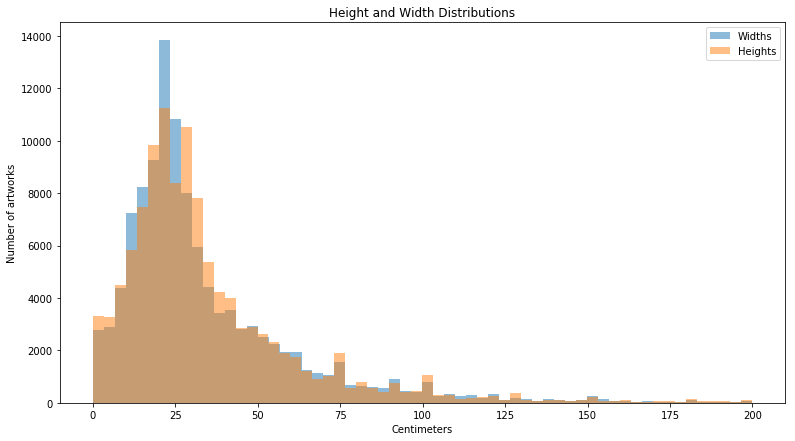

In [18]:
## Plotting two overlaid histograms with labels

plt.figure(figsize=(13,7))

temp_width_list = [item for item in width_list if item<200]
temp_height_list = [item for item in height_list if item<200]

plt.hist(temp_width_list, alpha=0.5, label='Widths', bins=60)
plt.hist(temp_height_list, alpha=0.5, label='Heights', bins=60)

plt.legend(loc='upper right')

plt.title('Height and Width Distributions')
plt.xlabel('Centimeters')
plt.ylabel('Number of artworks')

plt.show()

# *Scatter Plots: Height and Width Pairs*

In [19]:
## Creating a list of [height, width] coordinate pairs for each record with valid height and width values

height_width_pairs = []

for row in metadata_table:
    try:
        height = float(row[23])
        width = float(row[26])
        pair = [height, width]
        height_width_pairs.append(pair)
    except:
        pass

height_width_pairs[:10]           # Viewing first 10 [height, width] pairs

[[48.6, 168.9],
 [40.6401, 29.8451],
 [34.3, 31.8],
 [50.8, 50.8],
 [38.4, 19.1],
 [35.6, 45.7],
 [35.6, 45.7],
 [35.6, 45.7],
 [35.6, 45.7],
 [35.6, 45.7]]

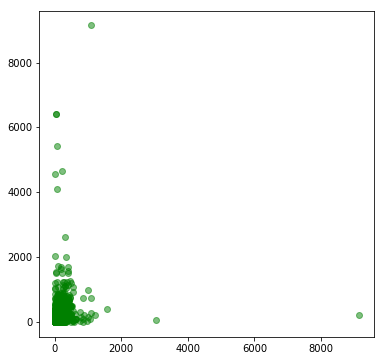

In [20]:
## Creating basic scatter plot

import matplotlib.pyplot as plt
%matplotlib inline

x_list = [item[0] for item in height_width_pairs]  # Creating a list of x values (index 0 in each pair)
y_list = [item[1] for item in height_width_pairs]  # Creating a list of y values (index 1 in each pair)

plt.figure(figsize=(6,6))

plt.scatter(x_list, y_list, c='green', alpha=0.5)

plt.show()

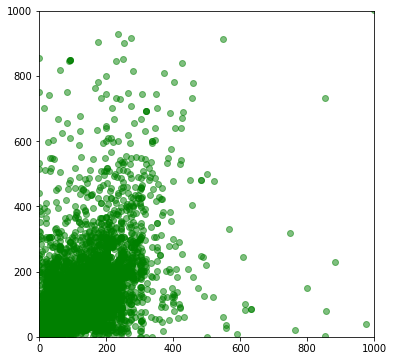

In [21]:
## Narrowing visible plot to x and y values under 1000 cm

x_list = [item[0] for item in height_width_pairs]  # Creating a list of x values (index 0 in each pair)
y_list = [item[1] for item in height_width_pairs]  # Creating a list of x values (index 1 in each pair)

plt.figure(figsize=(6,6))

plt.scatter(x_list, y_list, c='green', alpha=0.5)

plt.ylim(ymin=0, ymax=1000)
plt.xlim(xmin=0, xmax=1000)

plt.show()

# Getting closer, but still a bit indistinct. Let's zoom in further.

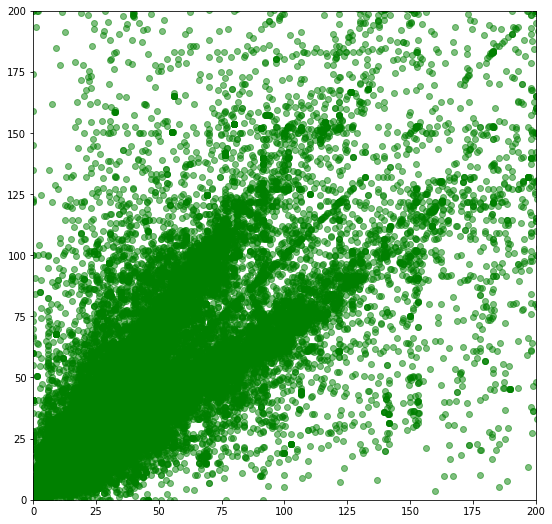

In [22]:
## Narrowing visible plot to x and y values under 200 cm and increasing plot size

x_list = [item[0] for item in height_width_pairs]  # Creating a list of x values (index 0 in each pair)
y_list = [item[1] for item in height_width_pairs]  # Creating a list of x values (index 1 in each pair)

plt.figure(figsize=(9,9))                          ## <-- Larger plot size

plt.scatter(x_list, y_list, c='green', alpha=0.5)

plt.ylim(ymin=0, ymax=200)                         ## <-- ymax=200
plt.xlim(xmin=0, xmax=200)                         ## <-- xmax=200

plt.show()

# *Pie Chart: Nationality*

In [23]:
## Creating a list of all items in the 'Nationality' field

nationality_list = []

for row in metadata_table:
    nationality_list.append(row[4])

nationality_list[:10]                  # Viewing first 10 items in nationality_list

['(Austrian)',
 '(French)',
 '(Austrian)',
 '()',
 '(Austrian)',
 '()',
 '()',
 '()',
 '()',
 '()']

In [24]:
## Viewing a few more

print(nationality_list[90])
print(nationality_list[8])
print(nationality_list[3329])
print(nationality_list[703])

(Swedish)
()
(Finnish)
(American)


In [25]:
## Stripping parentheses from the beginning and end of each item in 'nationality_list'

nationality_list_cleaned = [item.replace('() ', '').strip('()') for item in nationality_list]

nationality_list_cleaned[10000:10010]

# Note that some fields include multiple entries, so we're not done. Let's try again:

['Russian',
 'Various',
 'Various',
 'Russian) (Russian',
 'Russian',
 'Various',
 'Various',
 '',
 'Russian) (Russian',
 'American']

In [26]:
## Splitting each item at ')' and discarding everything that follows.
# We're also using .replace() to remove empty '()' entries when they appear first in a list of nationalities.
# We're extracting the first nationality listed and discarding the rest, which may distort the data.

nationality_list_cleaned = [item.replace('() ', '').split(')')[0].strip('()') for item in nationality_list]

nationality_list_cleaned[10000:10010]

['Russian',
 'Various',
 'Various',
 'Russian',
 'Russian',
 'Various',
 'Various',
 '',
 'Russian',
 'American']

In [27]:
### Pie chart with manual labels:

## Looping through list of nationalities, keeping a tally of how many times various values appear

american_tally = 0
french_tally = 0
british_tally = 0
missing_tally = 0
other_tally = 0


for item in nationality_list_cleaned:
    if item == 'American':
        american_tally += 1
    elif item == 'French':
        french_tally += 1
    elif item == 'British':
        british_tally += 1
    elif item == '':
        missing_tally += 1
    else:
        other_tally +=1

[59172, 22803, 6051, 5549, 40271]
['American', 'French', 'British', 'Missing nationality', 'Other']


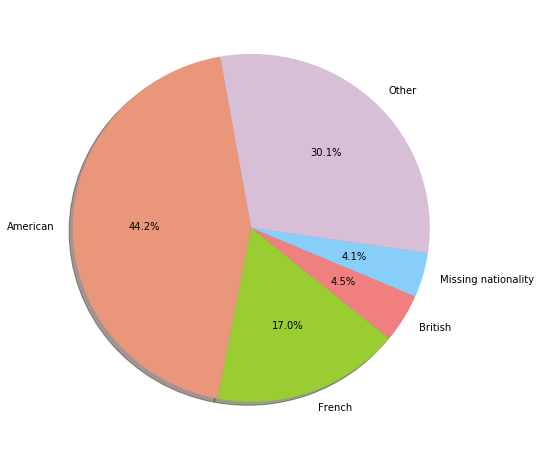

In [28]:
### Pie chart with manual labels:

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))

## A list of numbers, each representing the size of a different category
size_list = [american_tally, french_tally, british_tally, missing_tally, other_tally] 
print(size_list)

## A list of labels corresponding in order with the size list above
label_list = ['American', 'French', 'British', 'Missing nationality', 'Other']
print(label_list)

## Colors corresponding in order with the lists above
# List of color names: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
color_list = ['darksalmon', 'yellowgreen', 'lightcoral', 'lightskyblue', 'thistle']

# Plot
plt.pie(size_list, labels=label_list, colors=color_list, autopct='%1.1f%%', shadow=True, startangle=100) 

plt.show()

In [29]:
### Pie chart with automatic labels:

## Creating a list of nationalities by how many times they appear in 'nationality_list', sorted in descending order

from operator import itemgetter
import collections

counter = collections.Counter(nationality_list_cleaned)

nationality_count_pairs = sorted(counter.most_common(), key=itemgetter(1,0), reverse=True)

nationality_count_pairs[:10]

[('American', 59172),
 ('French', 22803),
 ('German', 9586),
 ('British', 6051),
 ('', 5549),
 ('Spanish', 3113),
 ('Italian', 3031),
 ('Japanese', 2578),
 ('Swiss', 2147),
 ('Russian', 1887)]

In [30]:
## Creating separate, corresponding lists for nationality values and how many times they appear in MoMA's collection

nationality_descending = [item[0] for item in nationality_count_pairs]
count_descending = [item[1] for item in nationality_count_pairs]

print(nationality_descending[:10])
print(count_descending[:10])

['American', 'French', 'German', 'British', '', 'Spanish', 'Italian', 'Japanese', 'Swiss', 'Russian']
[59172, 22803, 9586, 6051, 5549, 3113, 3031, 2578, 2147, 1887]


[59172, 22803, 9586, 6051, 5549, 3113, 3031, 2578, 2147, 1887, 1618, 1474, 1326, 1004, 881, 795, 778, 774, 745, 745, 671, 558, 537, 537, 486, 432, 395, 367, 290, 266, 248, 223, 204, 188, 179, 165, 164, 152, 140, 111, 97, 84, 73, 69, 68, 65, 64, 62, 61, 61, 57, 57, 51, 48, 44, 41, 39, 31, 28, 23, 21, 20, 16, 15, 15, 14, 14, 13, 13, 12, 12, 11, 10, 10, 9, 8, 8, 7, 7, 7, 7, 7, 7, 7, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['American', 'French', 'German', 'British', '', 'Spanish', 'Italian', 'Japanese', 'Swiss', 'Russian', 'Dutch', 'Belgian', 'Mexican', 'Austrian', 'Canadian', 'Argentine', 'Brazilian', 'Czech', 'Various', 'Colombian', 'Nationality Unknown', 'Nationality unknown', 'Polish', 'Chilean', 'Danish', 'Venezuelan', 'South African', 'Israeli', 'Swedish', 'Australian', 'Chinese', 'Finnish', 'Cuban', 'Norwegian', 'Indian', 'Portuguese', 'Yugoslav', 'Croatian', 'Hungarian', 'Peruvian', 'Korean', 'Ukrainian

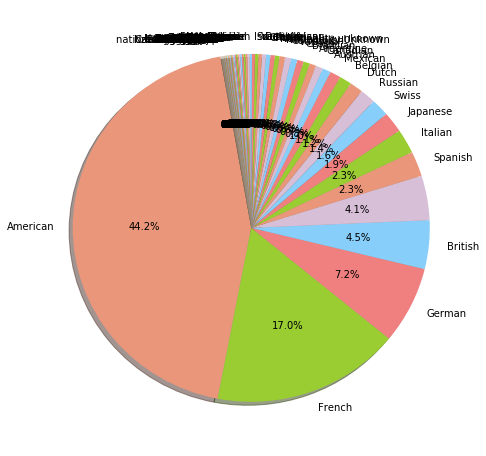

In [31]:
### Pie chart with automatic labels:

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,8))

## A list of numbers, each representing the size of a different category
size_list = count_descending
print(size_list)

## A list of labels corresponding in order with the size list above
label_list = nationality_descending
print(label_list)

## Colors corresponding in order with the lists above, repeating
# List of color names: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
color_list = ['darksalmon', 'yellowgreen', 'lightcoral', 'lightskyblue', 'thistle']

# Plot
plt.pie(size_list, labels=label_list, colors=color_list, autopct='%1.1f%%', shadow=True, startangle=100)

plt.show()

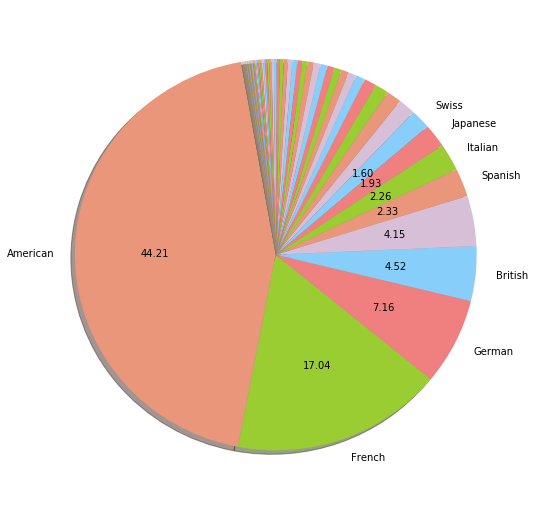

In [32]:
### Pie chart with automatic labels:

# Hiding labels for small values to make pie chart more readable

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9,9))


## A list of numbers, each representing the size of a different category
size_list = count_descending

## A list of labels corresponding in order with the size list above
label_list = nationality_descending[:9] + ['']*(len(nationality_descending) - 9)  ## Keeping the first 10 nationality labels  
                                                                                  ## and setting the rest to empty strings
## Colors corresponding in order with the lists above, repeating
# List of color names: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
color_list = ['darksalmon', 'yellowgreen', 'lightcoral', 'lightskyblue', 'thistle']

def my_autopct(pct):                                              ## Defining a function we'll point to in plt.pie() that
    return ('%.2f' % pct) if pct > 1.5 else ''                    ## returns '' (empty string) for percentages below 1.5

# Plot
plt.pie(size_list, labels=label_list, colors=color_list, autopct=my_autopct, shadow=True, startangle=100)

plt.show()